## PROJECT 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from bs4 import BeautifulSoup as soup

In [3]:
import requests

In [4]:
# url of the page of interest
wiki = 'https://en.wikipedia.org/wiki/List_of_countries_by_net_migration_rate'

# load the page
html = requests.get(wiki)

In [5]:
# save the content of the page
content = html.text
initialSoup = soup(content, "lxml")

In [6]:
tables = initialSoup.findAll('table', {'class' : 'wikitable sortable'})

In [7]:
secondSoup = soup(str(tables[0]),"lxml")
ths = secondSoup.find_all('td') # table contents

In [8]:
L=len(ths)
countries = []
total_pop = []
tnm = []
nm = []

for l in range(0, L, 4):
    countries.append(ths[int(l)].text)
    total_pop.append(ths[int(l+1)].text)
    tnm.append(ths[int(l+2)].text)
    nm.append(ths[int(l+3)].text)

In [9]:
df = pd.DataFrame()
df['Countries'] = countries
df['Total Population'] = total_pop
df['Total Net Migration'] = tnm
df['Net Migration'] = nm

In [10]:
## Shortest way to remove commas from the values
def remCommas(z,i):
    df[i] = [x.replace(z, '') for x in df[i]]
    return df[i]    

In [11]:
for x in df.iloc[:, 1:3]:
    remCommas(',', x)

In [12]:
## Remove non-breaking space '\xa0' in ISO 8859-1

df['Countries']= [x.replace('\xa0', '') for x in df['Countries']]

In [ ]:
## Longest way to remove commas from the values
df['Total Net Migration'] = [x.replace(',', '') for x in df['Total Net Migration']]
df['Total Population'] = [x.replace(',', '') for x in df['Total Population']]

In [13]:
type(df['Net Migration'][0]) # we want numbers, not strings

str

In [14]:
##Shortest way to convert string values to numeric
def ToNum(x):
    df[x] = pd.to_numeric(df[x], errors= 'coerce') # we need to use error argument because there are missing values
    return df[x]

In [15]:
for x in df.iloc[:,1:]:
    ToNum(x)

In [ ]:
## Longest way to convert string values to numeric
df['Net Migration'] = pd.to_numeric(df['Net Migration'], errors= 'coerce')
df['Total Net Migration'] = pd.to_numeric(df['Total Net Migration'], errors= 'coerce')
df['Total Population'] = pd.to_numeric(df['Total Population'], errors = 'coerce')

In [16]:
type(df['Net Migration'][0]) # here we are

numpy.float64

In [17]:
## Now the dataset is clean
df.head()

,Countries,Total Population,Total Net Migration,Net Migration
0,Aruba,102393.0,1253.0,12.24
1,Argentina,43847430.0,NaN,NaN
2,Afghanistan,29726803.0,473007.0,15.91
3,Angola,25789024.0,102322.0,4.51
4,Albania,2900247.0,-91750.0,-31.64


In [18]:
df.sort_values('Countries', inplace = True)

In [19]:
df.head() ## I want to reset the index according to the alphabetical order of the countries

,Countries,Total Population,Total Net Migration,Net Migration
2,Afghanistan,29726803.0,473007.0,15.91
4,Albania,2900247.0,-91750.0,-31.64
53,Algeria,37439427.0,-143268.0,-3.83
8,American Samoa,55227.0,NaN,NaN
6,Andorra,42095224.0,30000.0,0.71


In [20]:
df.reset_index(inplace = True)

In [21]:
df[df['Countries'] == 'World']

,index,Countries,Total Population,Total Net Migration,Net Migration
213,210,World,7.089452e+09,0.0,0.0


In [22]:
# Remove the row world from the dataframe

df.drop(df.index[213], inplace = True)

In [23]:
df.drop(columns= 'index', inplace = True) # remove also the column index

In [24]:
df.head()

,Countries,Total Population,Total Net Migration,Net Migration
0,Afghanistan,29726803.0,473007.0,15.91
1,Albania,2900247.0,-91750.0,-31.64
2,Algeria,37439427.0,-143268.0,-3.83
3,American Samoa,55227.0,NaN,NaN
4,Andorra,42095224.0,30000.0,0.71


In [25]:
df.tail()

,Countries,Total Population,Total Net Migration,Net Migration
211,Vietnam,88809200.0,-200002.0,-2.25
212,West Bank and Gaza Strip,4046901.0,-43750.0,-10.81
214,Yemen,24882792.0,-50000.0,-2.01
215,Zambia,14786581.0,-34490.0,-2.33
216,Zimbabwe,14565482.0,-219922.0,-15.10


In [26]:
## I want to add the continent column

Asia = ['Yemen','Maldives','Malaysia','Kazakhstan','Kuwait', 'Azerbaijan','Hong Kong', 'Bhutan', 'Lebanon', 'Qatar','Saudi Arabia', 'Philippines', 'Pakistan', 'Oman','Myanmar', 'Sri Lanka', 'Macau', 'Korea, North','Korea, South', 'Laos', 'Lebanon','Thailand','Indonesia','China','Japan','Bangladesh', 'India', 'Nepal', 
        'West Bank and Gaza Strip', 'Vietnam', 'Syria', 'Timor-Leste', 'Turkmenistan', 'Tajikistan', 'Afghanistan', 'United Arab Emirates', 'Armenia', 'Bahrain', 'Brunei', 'Iran', 'Iraq', 'Jordan', 'Kyrgyzstan', 'Cambodia', 'Mongolia','Uzbekistan', 'Singapore']
Europe = ['Malta','Gibraltar', 'Kosovo', 'Georgia','Greece', 'Austria', 'Albania', 'Italy', 'France', 'Luxembourg', 'Germany', 'United Kingdom', 'Sweden', 'Russia', 'Finland','Norway', 'Israel',
          'Denmark', 'Switzerland', 'Andorra', 'Spain', 'Croatia', 'Hungary', 'Ireland', 'Estonia', 'Greenland', 'Iceland',
          'Iceland', 'Liechtenstein', 'Monaco', 'Latvia', 'Moldova', 'Macedonia', 'Montenegro', 'Netherlands', 'Poland', 
          'Portugal', 'Romania', 'Serbia', 'Slovenia', 'Turkey', 'Ukraine', 'Belgium', 'Lithuania', 'San Marino', 'Slovakia', 'Belarus', 'Bulgaria', 'Cyprus', 'Czech Republic', 'Isle of Man', 'Bosnia and Herzegovina']
North_Center_America = ['Cayman Islands', 'Honduras','Haiti','El Salvador','Saint Vincent and the Grenadines','British Virgin Islands','U.S. Virgin Islands','Antigua and Barbuda', 'Bermuda', 'Costa Rica','Cuba', 'Jamaica','Saint Martin', 'Sint Maarten', 'Saint Lucia','Saint Kitts and Nevis','United States','Mexico', 'Canada',
                        'Aruba','Barbados', 'Curaçao', 'Puerto Rico', 'Grenada', ' Honduras', 'Nicaragua', 'Bahamas', 'Belize', 'Dominican Republic', 'Guatemala', 'Panama','Trinidad and Tobago']
South_America = ['Peru', 'Bolivia' , 'Guatemala' , 'Venezuela' , 'Mexico' , 'Argentina', 'Brazil', 'Chile', 'Uruguay', 
                 'Paraguay', 'Guyana', 'Colombia', 'Ecuador', 'Suriname']
Africa = ['Kenya','Gabon', 'Lesotho', 'Algeria','Libya', 'Sierra Leone','Angola','Burkina Faso', 'Namibia', 'Mauritania','Mauritius', 'Niger', 'Rwanda', 'São Tomé and Príncipe', 'Nigeria', 'Eritrea','Malawi','Ethiopia', 'Madagascar', 'Liberia', 'Gambia', 'Equatorial Guinea' 'Algeria','Chad', 'Uganda', 'South Africa', 'Congo, Republic of the','Congo, Democratic Republic of the',
          'Senegal', 'Guinea-Bissau' , 'Egypt', 'Morocco', 'Swaziland', 'Mozambique','Zambia' , 'Zimbabwe', 'Djibouti', 'Ghana','Burundi', 'Equatorial Guinea', 'Togo','Tanzania',
         'Seychelles', 'Tunisia', 'Benin', 'Botswana', 'Central African Republic', 'Cameroon', "Cote d'Ivoire", 'Cabo Verde', 'Comoros', 'Mali', 'Sudan', 'South Sudan', 'Somalia']

In [27]:
def find_continent(x):
    if x in Asia:
        return 'Asia'
    elif x in South_America:
        return 'South America'
    elif x in Europe:
        return 'Europe'
    elif x in North_Center_America:
        return 'North&Center America'
    elif x in Africa:
        return 'Africa'
    else:
        return 'Ocean'
df['Continent'] = df['Countries'].apply(find_continent)
df.head()


,Countries,Total Population,Total Net Migration,Net Migration,Continent
0,Afghanistan,29726803.0,473007.0,15.91,Asia
1,Albania,2900247.0,-91750.0,-31.64,Europe
2,Algeria,37439427.0,-143268.0,-3.83,Africa
3,American Samoa,55227.0,NaN,NaN,Ocean
4,Andorra,42095224.0,30000.0,0.71,Europe


In [28]:
by_cont = df.groupby('Continent').mean() # create a new dataframe in which I group by the continent and compute the means.
by_cont

,Total Population,Total Net Migration,Net Migration
Continent,,,
Africa,2.083531e+07,-54701.811321,-4.863654
Asia,9.009970e+07,-174757.391304,18.950000
Europe,1.701246e+07,134477.750000,2.573409
North&Center America,1.395282e+07,226133.347826,-5.694783
Ocean,2.230587e+06,68175.500000,-16.400000
South America,3.890659e+07,-96133.384615,-7.469231


In [29]:
# this function comes in very handy for plotting barplots

def makebar(i, ylabel, title):
    xlabels = by_cont.index
    y = by_cont[i]
    bar_width = 0.9
    x = np.arange(len(y))
    fig, ax = plt.subplots(1,1,figsize = (14,14), dpi = 100)
    ax.bar(x, y, width=bar_width, color = 'r', edgecolor = 'blue')
    ax.set_xticks(x+(bar_width/12))
    ax.set_xticklabels(xlabels, color = 'blue')
    ax.set_title(title, fontsize = 20)
    ax.set_xlabel('Continents', color = 'r', fontsize = 20)
    ax.set_ylabel(ylabel)
    plt.show()

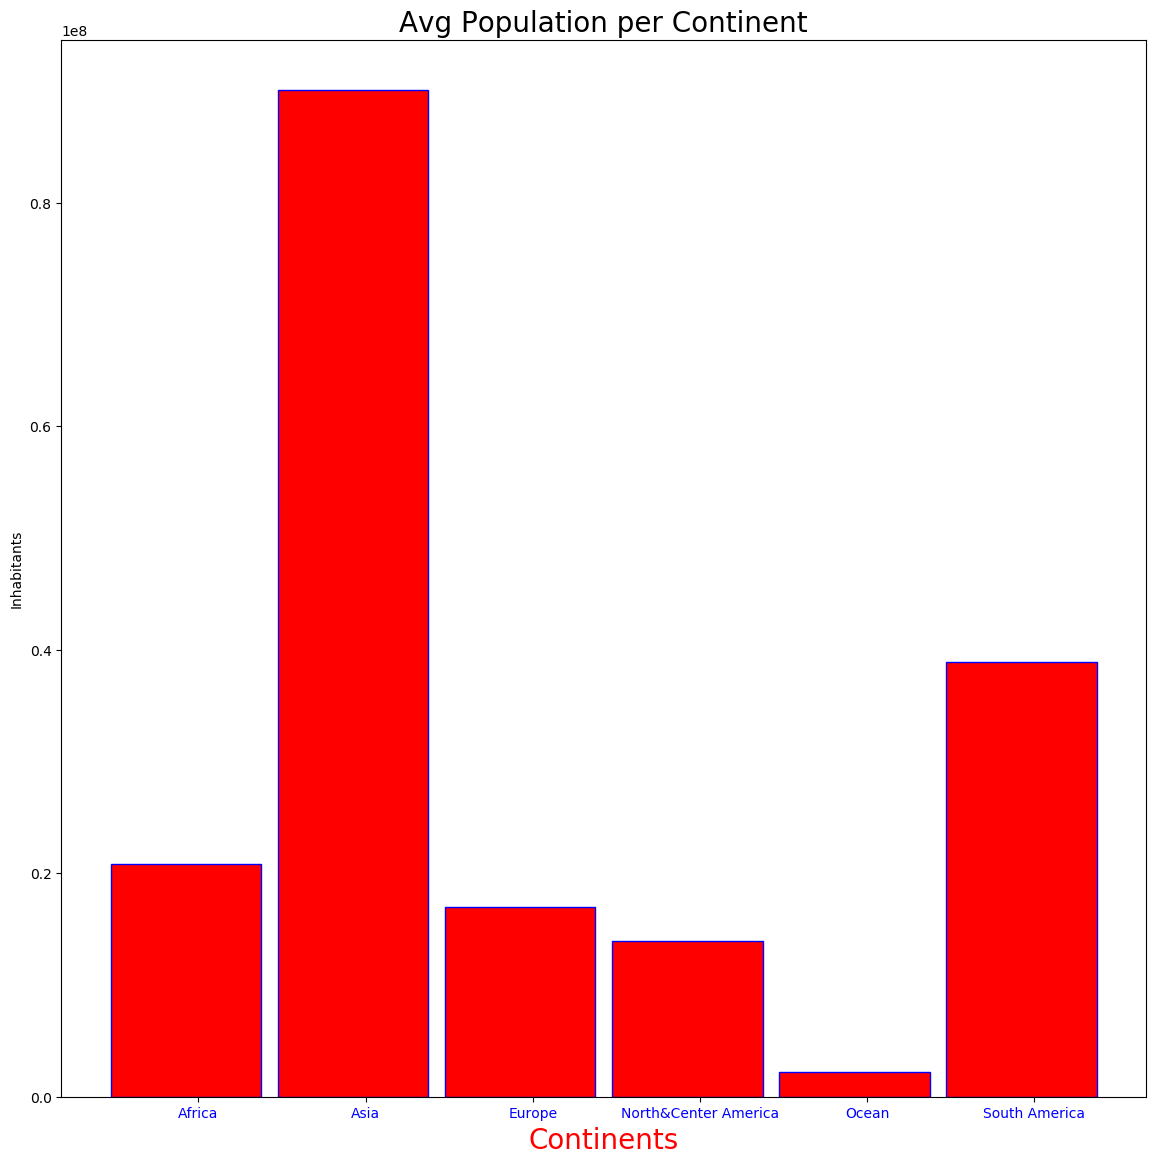

In [30]:
makebar('Total Population', 'Inhabitants', 'Avg Population per Continent')

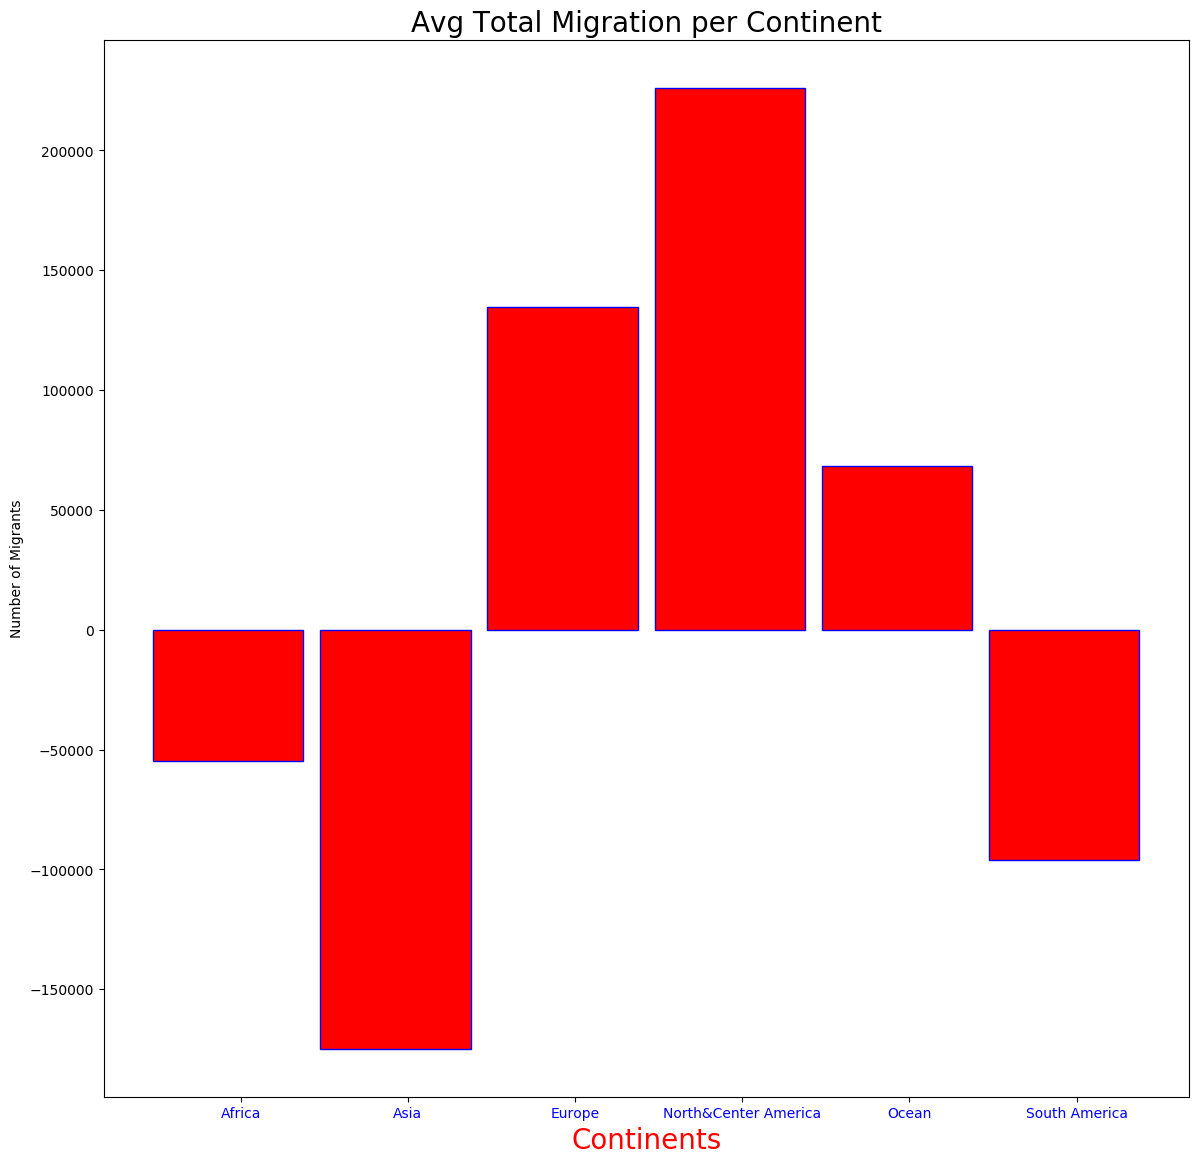

In [31]:
makebar('Total Net Migration', 'Number of Migrants', 'Avg Total Migration per Continent')

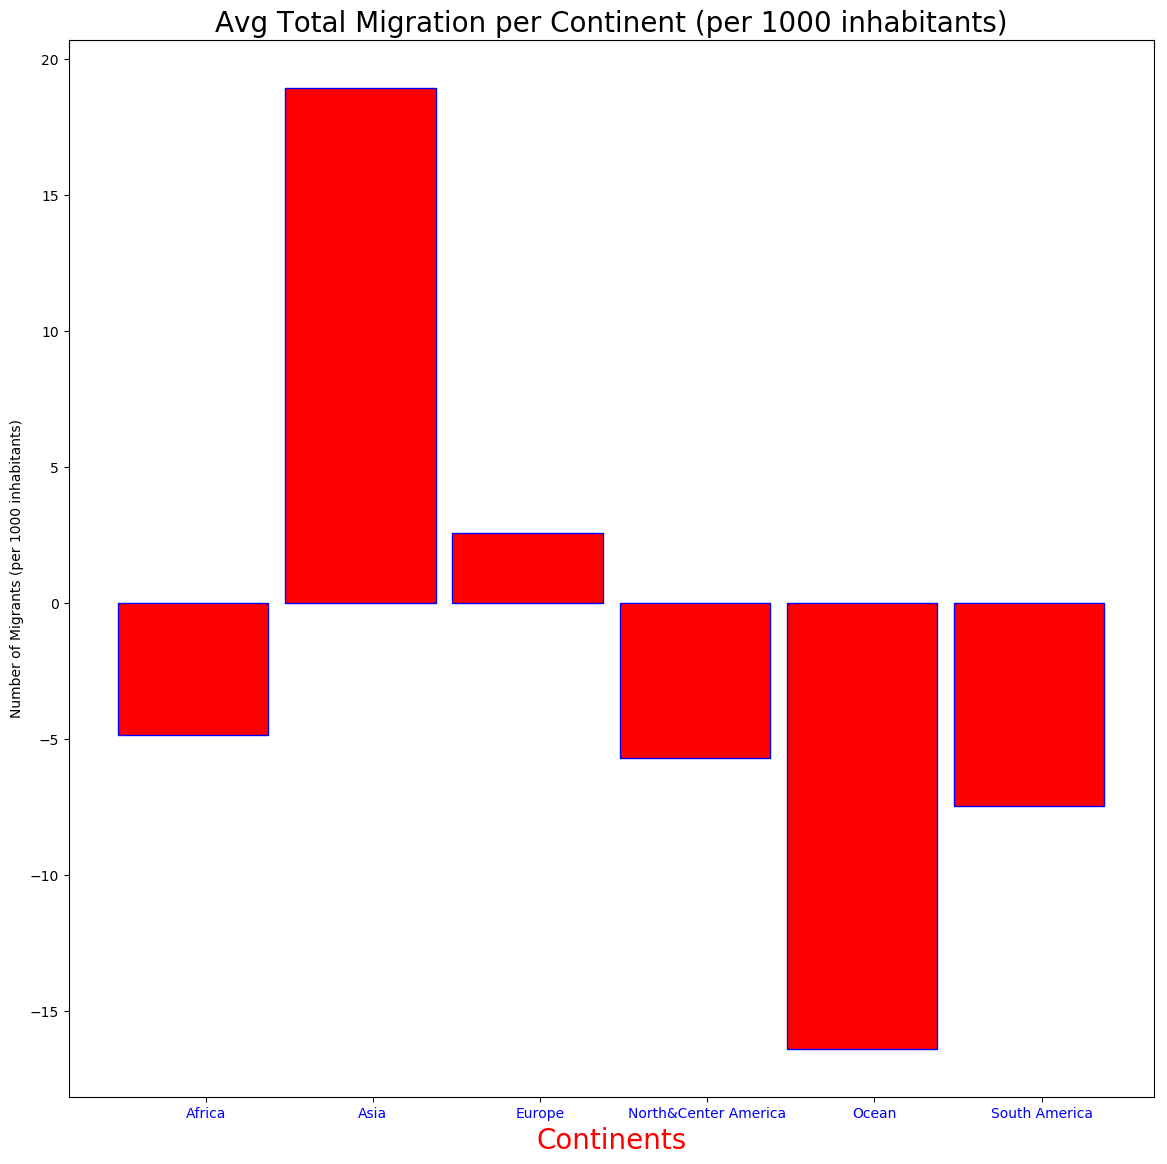

In [32]:
makebar('Net Migration', 'Number of Migrants (per 1000 inhabitants)', 'Avg Total Migration per Continent (per 1000 inhabitants)')